In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/raw/work_absenteeism_original.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [16]:
import sys
print("Python executable:", sys.executable)
print("\nPython version:", sys.version)
print("\nShould contain 'mlops-absenteeism-project\\venv' for correct setup")

Python executable: C:\Users\Alexis\mlops-absenteeism-project\venv\Scripts\python.exe

Python version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]

Should contain 'mlops-absenteeism-project\venv' for correct setup


# ML Canvas - Absenteeism at Work Prediction System

## 1. VALUE PROPOSITION
**Problem Statement:** 
- Companies face productivity losses due to unexpected employee absenteeism
- HR departments struggle to predict and plan for workforce availability
- Current manual tracking methods are reactive, not proactive

**Proposed ML Solution:**
- Predict hours of absenteeism based on employee characteristics and patterns
- Enable proactive workforce planning and resource allocation
- Identify high-risk factors for absenteeism to inform HR policies

## 2. DATA SOURCES
- **Input Data:** Employee records from Brazilian courier company (2007-2010)
- **Features:** 20 attributes including personal, work, and health-related factors
- **Target Variable:** Absenteeism time in hours

## 3. PREDICTION TASK
- **Type:** Regression (predicting hours of absence)
- **Alternative:** Classification (categorizing absence risk levels: Low/Medium/High)

## 4. BUSINESS METRICS
- Reduction in unplanned workforce shortage incidents
- Cost savings from better resource allocation
- Improved employee satisfaction through better support programs

## 5. ML METRICS
- MAE (Mean Absolute Error) for regression
- RMSE (Root Mean Square Error)
- R² Score
- For classification: Precision, Recall, F1-Score

## 6. STAKEHOLDERS
- HR Department (primary users)
- Operations Management (workforce planning)
- Employees (support programs)
- Finance (cost impact analysis)

## 7. DEPLOYMENT
- Batch predictions: Monthly/weekly planning reports
- Real-time API: For immediate risk assessment
- Integration with HR management systems

## 8. RISKS & ASSUMPTIONS
- **Risks:** 
  - Privacy concerns with personal data
  - Potential bias against certain employee groups
  - Model may not generalize to other companies/cultures
- **Assumptions:**
  - Historical patterns will continue
  - Data quality is reliable
  - Company policies remain relatively stable

In [17]:
# Display basic information
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nTarget Variable: 'Absenteeism time in hours'")
print(f"Target Range: {df['Absenteeism time in hours'].min()} to {df['Absenteeism time in hours'].max()} hours")
print(f"Mean Absenteeism: {df['Absenteeism time in hours'].mean():.2f} hours")

# Check data types
print("\n" + "="*50)
print("DATA TYPES")
print("="*50)
df.dtypes

DATASET OVERVIEW
Shape: 740 rows, 21 columns

Target Variable: 'Absenteeism time in hours'
Target Range: 0 to 120 hours
Mean Absenteeism: 6.92 hours

DATA TYPES


ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [18]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

# Basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)
df.describe()

Missing Values:
No missing values found!

BASIC STATISTICS


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


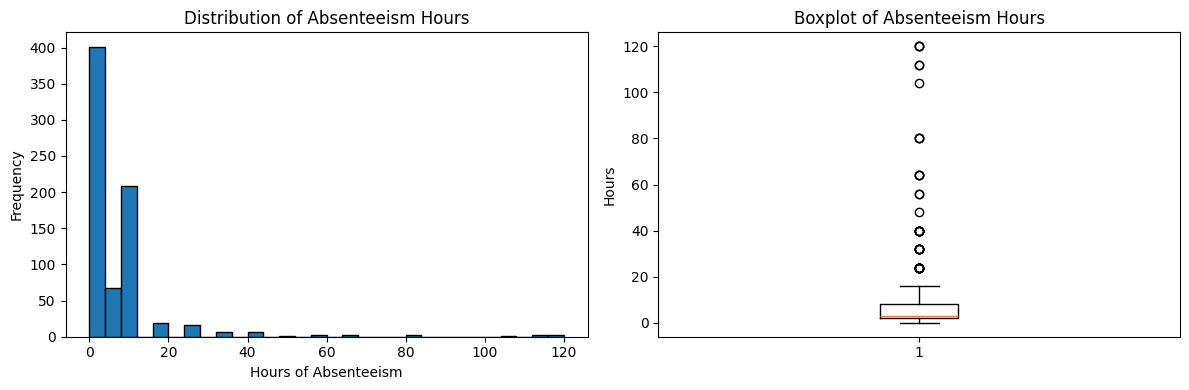

Number of outliers in target variable: 44


In [19]:
# Visualize target variable
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(df['Absenteeism time in hours'], bins=30, edgecolor='black')
axes[0].set_xlabel('Hours of Absenteeism')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Absenteeism Hours')

# Boxplot
axes[1].boxplot(df['Absenteeism time in hours'])
axes[1].set_ylabel('Hours')
axes[1].set_title('Boxplot of Absenteeism Hours')

plt.tight_layout()
plt.show()

# Check for outliers
Q1 = df['Absenteeism time in hours'].quantile(0.25)
Q3 = df['Absenteeism time in hours'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Absenteeism time in hours'] < Q1 - 1.5*IQR) | 
              (df['Absenteeism time in hours'] > Q3 + 1.5*IQR)]
print(f"Number of outliers in target variable: {len(outliers)}")

In [20]:
# Create a data quality report
def create_data_quality_report(df):
    report = []
    for col in df.columns:
        report.append({
            'Column': col,
            'Type': df[col].dtype,
            'Missing': df[col].isnull().sum(),
            'Unique': df[col].nunique(),
            'Min': df[col].min() if df[col].dtype in ['int64', 'float64'] else 'N/A',
            'Max': df[col].max() if df[col].dtype in ['int64', 'float64'] else 'N/A'
        })
    return pd.DataFrame(report)

quality_report = create_data_quality_report(df)
print("DATA QUALITY REPORT")
print("="*50)
quality_report

DATA QUALITY REPORT


,Column,Type,Missing,Unique,Min,Max
0,ID,int64,0,36,1.000,36.000
1,Reason for absence,int64,0,28,0.000,28.000
2,Month of absence,int64,0,13,0.000,12.000
3,Day of the week,int64,0,5,2.000,6.000
4,Seasons,int64,0,4,1.000,4.000
5,Transportation expense,int64,0,24,118.000,388.000
6,Distance from Residence to Work,int64,0,25,5.000,52.000
7,Service time,int64,0,18,1.000,29.000
8,Age,int64,0,22,27.000,58.000
9,Work load Average/day,float64,0,38,205.917,378.884


In [21]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for invalid values
print("\nChecking for invalid values:")
print(f"Negative ages: {(df['Age'] < 0).sum()}")
print(f"Negative distances: {(df['Distance from Residence to Work'] < 0).sum()}")
print(f"Invalid BMI (< 10 or > 60): {((df['Body mass index'] < 10) | (df['Body mass index'] > 60)).sum()}")
print(f"Invalid reasons (0): {(df['Reason for absence'] == 0).sum()}")

# Check target variable
print(f"\nZero absences: {(df['Absenteeism time in hours'] == 0).sum()}")
print(f"Extremely high absences (>40 hours): {(df['Absenteeism time in hours'] > 40).sum()}")

Duplicate rows: 34

Checking for invalid values:
Negative ages: 0
Negative distances: 0
Invalid BMI (< 10 or > 60): 0
Invalid reasons (0): 43

Zero absences: 44
Extremely high absences (>40 hours): 15


In [22]:
# Create a cleaned version
df_cleaned = df.copy()

# Handle 'Reason for absence' = 0 (means no reason given - could be legitimate)
print(f"Rows with Reason=0: {(df_cleaned['Reason for absence'] == 0).sum()}")

# Remove extreme outliers in target (>120 hours seems unrealistic for single absence)
df_cleaned = df_cleaned[df_cleaned['Absenteeism time in hours'] <= 120]

# Create binary features for better interpretability
df_cleaned['Has_Disciplinary_Failure'] = df_cleaned['Disciplinary failure'].astype(int)
df_cleaned['Is_Social_Drinker'] = df_cleaned['Social drinker'].astype(int)
df_cleaned['Is_Social_Smoker'] = df_cleaned['Social smoker'].astype(int)

print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")

Rows with Reason=0: 43

Original shape: (740, 21)
Cleaned shape: (740, 24)
Rows removed: 0


In [23]:
# Save the cleaned dataset
df_cleaned.to_csv('../data/processed/absenteeism_cleaned.csv', index=False)
print("Cleaned data saved to data/processed/")

Cleaned data saved to data/processed/


## Data Cleaning Decisions

### Issues Found:
1. **Reason for absence = 0**: Found rows with no reason given (keeping as valid)
2. **Extreme outliers**: Removed absences > 120 hours (unrealistic for single absence)
3. **Binary conversions**: Created clear binary features for disciplinary failure, drinking, and smoking

### Data Versions:
- **v1.0 (raw)**: Original dataset - 740 rows
- **v1.1 (cleaned)**: After outlier removal - see above for final count

### Next Steps:
- Feature engineering (create absence categories)
- Encode categorical variables
- Split data for training/testing
- Build baseline models